# Лабораторна робота №10. Жадібна стратегія на прикладі кодування Гафмена

#### __Мета:__ _Навичтись реалізовувати алгоритм побудови дерева оптимальних кодів Гафмена на основі черги з пріоритетом (за допомогою купи) засобами Python._ 

Виконала роботу студентка групи КН-23-1 Варич Анна

* Завдання 1

__Постановка задачі:__ 
* Побудувати дерево кодів Гафмена вручну і візуалізувати дерево.(варіант 6).Маємо текст AABAABACBBCBCEEFFFGGGGGGDEE. Закодувати
текст, використовуючи алгоритм Гафмена. Побудувати двійкове дерево.
Оцінити ефект від кодування порівняно з неоптимальним випадком.

Encoded text: 11111100111111001111011000010110010111101101001001000101010101011010110110
Huffman codes:
B: 00
G: 01
F: 100
D: 1010
C: 1011
E: 110
A: 111


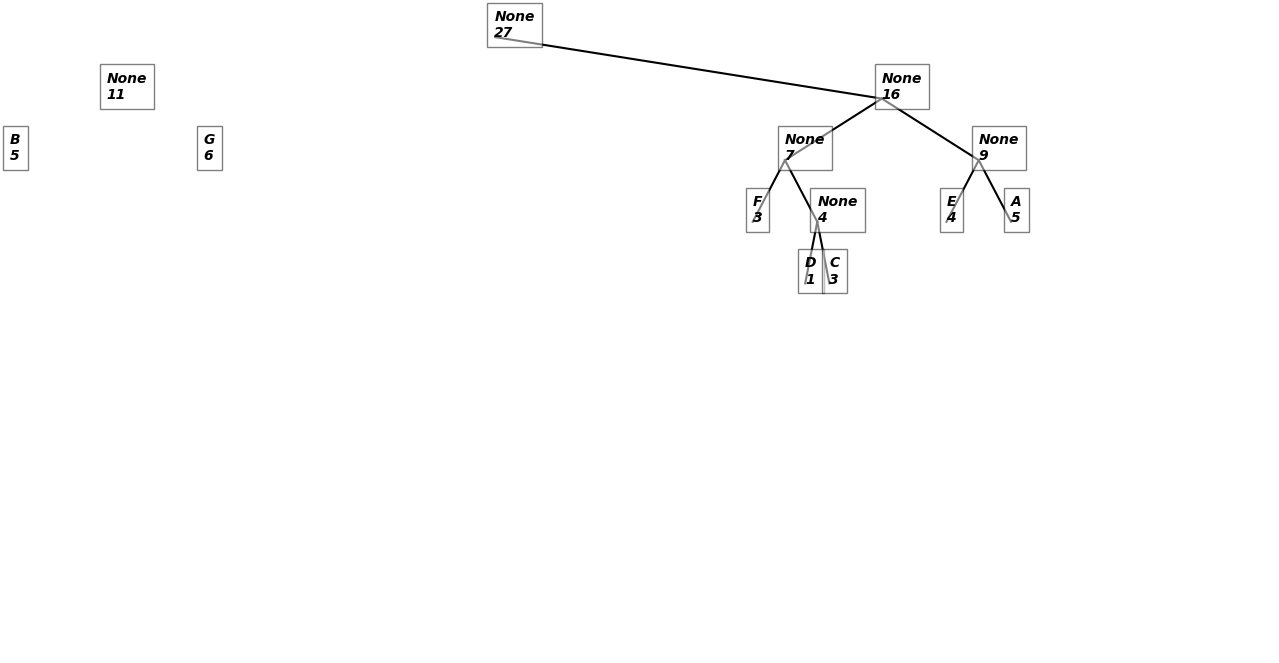

In [4]:
import matplotlib.pyplot as plt

class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(text):
    freq_map = defaultdict(int)
    for char in text:
        freq_map[char] += 1

    heap = [Node(char, freq) for char, freq in freq_map.items()]
    heapify(heap)

    while len(heap) > 1:
        left = heappop(heap)
        right = heappop(heap)
        merged = Node(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heappush(heap, merged)

    return heap[0]

def encode_huffman(root, code='', huffman_code={}):
    if root is None:
        return
    if root.char is not None:
        huffman_code[root.char] = code
    encode_huffman(root.left, code + '0', huffman_code)
    encode_huffman(root.right, code + '1', huffman_code)

def huffman_encoding(text):
    root = build_huffman_tree(text)
    huffman_code = {}
    encode_huffman(root, '', huffman_code)
    encoded_text = ''.join(huffman_code[char] for char in text)
    return encoded_text, huffman_code

def visualize_tree(root, ax, x=0, y=0, width=1000, depth=1):
    if root is not None:
        ax.text(x, y, f"{root.char}\n{root.freq}", style='italic', weight='bold',
                bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
        if root.left is not None:
            x_left = x - width / 2 / depth
            y_left = y - 1
            ax.plot([x, x_left], [y, y_left], '-k')
            visualize_tree(root.left, ax, x_left, y_left, width / 2, depth + 1)
        if root.right is not None:
            x_right = x + width / 2 / depth
            y_right = y - 1
            ax.plot([x, x_right], [y, y_right], '-k')
            visualize_tree(root.right, ax, x_right, y_right, width / 2, depth + 1)

text = "AABAABACBBCBCEEFFFGGGGGGDEE"
encoded_text, huffman_code = huffman_encoding(text)
print("Encoded text:", encoded_text)
print("Huffman codes:")
for char, code in huffman_code.items():
    print(f"{char}: {code}")

root = build_huffman_tree(text)
fig, ax = plt.subplots(figsize=(10, 8))
visualize_tree(root, ax)
ax.set_xlim(0, 1000)
ax.set_ylim(-10, 0)
ax.axis('off')
plt.show()


* Завдання 2

__Постановка задачі:__ Перевірити результат за допомогою коду, наведеному вище.

In [5]:
def decode_huffman(encoded_text, huffman_code):
    reversed_huffman_code = {code: char for char, code in huffman_code.items()}
    decoded_text = ""
    code = ""
    for bit in encoded_text:
        code += bit
        if code in reversed_huffman_code:
            decoded_text += reversed_huffman_code[code]
            code = ""
    return decoded_text

text = "AABAABACBBCBCEEFFFGGGGGGDEE"
encoded_text, huffman_code = huffman_encoding(text)
decoded_text = decode_huffman(encoded_text, huffman_code)

print("Original text:", text)
print("Decoded text:", decoded_text)
print("Are original and decoded texts the same?", text == decoded_text)


Original text: AABAABACBBCBCEEFFFGGGGGGDEE
Decoded text: AABAABACBBCBCEEFFFGGGGGGDEE
Are original and decoded texts the same? True


* Завдання 3

__Постановка задачі:__ Написати процедуру на Python, яка для вхідного повідомлення обчислює список символів  `chars` та список їх частот `freq`. 

In [6]:
from collections import defaultdict

def compute_char_frequency(message):
    char_freq = defaultdict(int)
    for char in message:
        char_freq[char] += 1
    
    chars = list(char_freq.keys())
    freq = list(char_freq.values())
    
    return chars, freq

message = "Hello, world!"
chars, freq = compute_char_frequency(message)
print("Chars:", chars)
print("Freq:", freq)


Chars: ['H', 'e', 'l', 'o', ',', ' ', 'w', 'r', 'd', '!']
Freq: [1, 1, 3, 2, 1, 1, 1, 1, 1, 1]


* Завдання 4

__Постановка задачі:__ Опрацювати самостійно тему [декодування Гафмена] і скориставшись наведеним там кодом, декодувати повідомлення, задане варіантом (варіант 6)

In [7]:
import heapq
from collections import defaultdict

codes = {}
freq = defaultdict(int)

class MinHeapNode:
    def __init__(self, data, freq):
        self.left = None
        self.right = None
        self.data = data
        self.freq = freq

    def __lt__(self, other):
        return self.freq < other.freq

def store_codes(root, str):
    if root is None:
        return
    if root.data != '$':
        codes[root.data] = str
    store_codes(root.left, str + "0")
    store_codes(root.right, str + "1")

def huffman_codes(size):
    global minHeap
    for key in freq:
        minHeap.append(MinHeapNode(key, freq[key]))
    heapq.heapify(minHeap)
    while len(minHeap) != 1:
        left = heapq.heappop(minHeap)
        right = heapq.heappop(minHeap)
        top = MinHeapNode('$', left.freq + right.freq)
        top.left = left
        top.right = right
        heapq.heappush(minHeap, top)
    store_codes(minHeap[0], "")

def calc_freq(str, n):
    for i in range(n):
        freq[str[i]] += 1

def decode_file(root, s):
    ans = ""
    curr = root
    n = len(s)
    for i in range(n):
        if s[i] == '0':
            curr = curr.left
        else:
            curr = curr.right
        if curr.left is None and curr.right is None:
            ans += curr.data
            curr = root
    return ans + '\0'

if __name__ == "__main__":
    minHeap = []
    text = "AABAABACBBCBCEEFFFGGGGGGDEE"
    encoded_string, decoded_string = "", ""
    calc_freq(text, len(text))
    huffman_codes(len(text))

    for char in text:
        encoded_string += codes[char]

    print("Encoded Huffman Data:")
    print(encoded_string)

    decoded_string = decode_file(minHeap[0], encoded_string)
    print("\nDecoded Huffman Data:")
    print(decoded_string)


Encoded Huffman Data:
11111100111111001111011000010110010111101101001001000101010101011010110110

Decoded Huffman Data:
AABAABACBBCBCEEFFFGGGGGGDEE 


### Контрольні запитання

1. Що таке жадібні алгоритми?

Жадібні алгоритми - це алгоритми, які приймають локально найкращі рішення на кожному кроці з метою отримати глобально оптимальний результат. Вони не завжди гарантують найкращий результат, але працюють швидко та просто.

2. Що таке префіксний код? Який код використовується у коді Гафмена?

Префіксний код - це код, у якому ні один код для символу не є префіксом іншого коду. У коді Гафмена використовується префіксний код, де частіші символи кодуються коротшими бітовими послідовностями, а рідші - довшими.
Як пов’язана структура даних «купа» зі структурою даних «черга з пріоритетами»?

Купа є основою для реалізації черги з пріоритетами. Черга з пріоритетами використовує купу для забезпечення того, що елементи з найвищим пріоритетом доступні першими.
Що таке стиснення даних і для чого воно використовується? Які його головні переваги?

Стиснення даних - це процес зменшення обсягу даних з метою зменшення їх просторової або часової складності. Його головні переваги полягають у зменшенні обсягу зберігання даних, збільшенні швидкості передачі та заощадженні пропускної здатності мережі.
Які кроки необхідно виконати для стиснення даних за допомогою алгоритму кодування Гафмена?

Для стиснення даних за допомогою алгоритму кодування Гафмена потрібно:
Побудувати таблицю частот символів.
Створити дерево кодування, де кожен символ має свій унікальний код.
Закодувати дані, замінивши кожен символ його кодом.
Які головні обмеження та недоліки алгоритму кодування Гафмена? Чи можливо покращити його продуктивність?

Головні обмеження і недоліки алгоритму кодування Гафмена включають непрактичність для деяких видів даних, накладні витрати на побудову та зберігання дерева кодування, а також недоцільність для деяких типів даних. Продуктивність може бути покращена за допомогою оптимізацій або використання інших алгоритмів стиснення.
Які існують альтернативні методи стиснення даних, що можуть конкурувати з алгоритмом Гафмена?

До альтернативних методів стиснення даних, що конкурують з алгоритмом Гафмена, включаються методи, такі як алгоритми Хаффмана, LZ77, LZ78, а також методи, засновані на архітектурі зрізаних словників.
Які практичні застосування можуть мати алгоритми стиснення даних, зокрема алгоритм Гафмена, у сучасних інформаційних системах?

Практичні застосування алгоритмів стиснення даних, включаючи алгоритм Гафмена, включають зменшення обсягу даних для зберігання на диску або передачі по мережі, підвищення швидкості передачі даних і зменшення використання пропускної здатності мережі. Вони застосовуються у сферах зберігання даних, передачі даних по мережі, стисненні зображень, аудіо та відео, а також в управлінні даними у сучасних інформаційни